In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

In [2]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Classifier Results:
Accuracy: 0.84


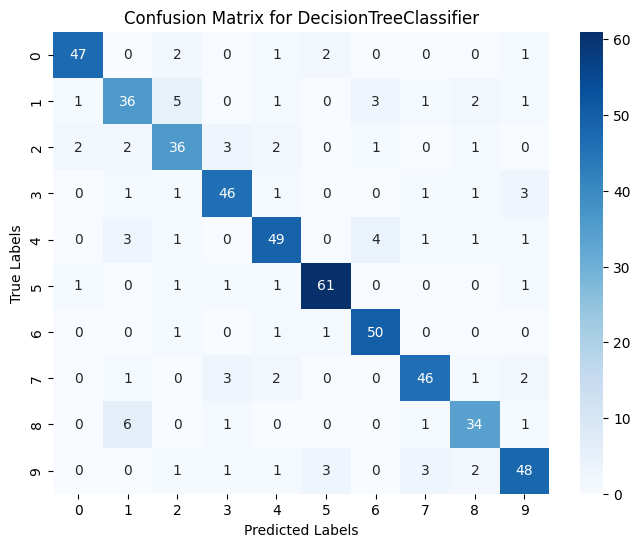

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.73      0.72      0.73        50
           2       0.75      0.77      0.76        47
           3       0.84      0.85      0.84        54
           4       0.83      0.82      0.82        60
           5       0.91      0.92      0.92        66
           6       0.86      0.94      0.90        53
           7       0.87      0.84      0.85        55
           8       0.81      0.79      0.80        43
           9       0.83      0.81      0.82        59

    accuracy                           0.84       540
   macro avg       0.84      0.83      0.83       540
weighted avg       0.84      0.84      0.84       540



In [5]:
print("Decision Tree Classifier Results:")
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Gaussian Naive Bayes Classifier Results:
Accuracy: 0.85


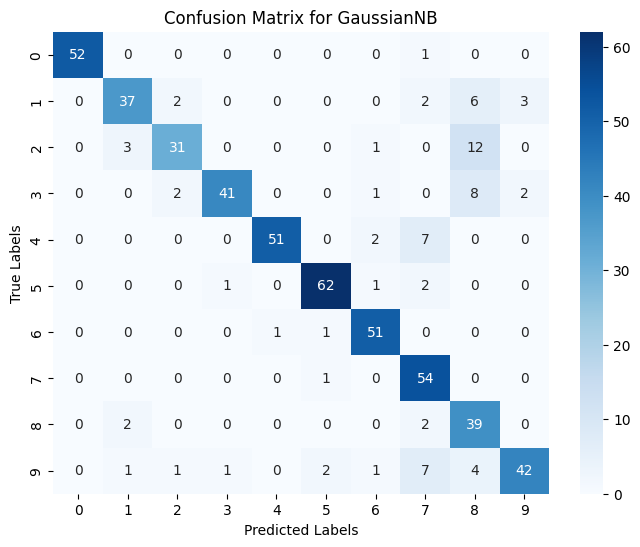

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.86      0.74      0.80        50
           2       0.86      0.66      0.75        47
           3       0.95      0.76      0.85        54
           4       0.98      0.85      0.91        60
           5       0.94      0.94      0.94        66
           6       0.89      0.96      0.93        53
           7       0.72      0.98      0.83        55
           8       0.57      0.91      0.70        43
           9       0.89      0.71      0.79        59

    accuracy                           0.85       540
   macro avg       0.87      0.85      0.85       540
weighted avg       0.88      0.85      0.85       540



In [6]:
print("Gaussian Naive Bayes Classifier Results:")
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test)

In [4]:
# Function to evaluate a model and print metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[str(i) for i in model.classes_]))

In [8]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

In [10]:
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=10)
nb_scores = cross_val_score(GaussianNB(), X, y, cv=10)

t_stat, p_value = ttest_rel(nb_scores, dt_scores)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The difference between the two models is statistically significant.")
else:
    print("The difference between the two models is not statistically significant.")

T-statistic: -1.079, P-value: 0.309
The difference between the two models is not statistically significant.
